In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

def wavelet_denoising(data): 
#def wavelet_de
    wavelet = 'db4'
    
    # Calculate a threshold for each level of wavelet coefficients
    threshold = np.std(data) * np.sqrt(2 * np.log(len(data)))
    
    # Decompose the data into wavelet coefficients
    coeffs = pywt.wavedec(data, wavelet, mode='per')
    
    # Set coefficients below the threshold to zero
    coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
     
    # Reconstruct the signal using the denoised wavelet coefficients
    denoised = pywt.waverec(coeffs, wavelet, mode='per')
    
    return denoised[:len(data)]

def denoising(list_):
    output=[]
    for item in list_:
        output.append(wavelet_denoising(item))
    return output

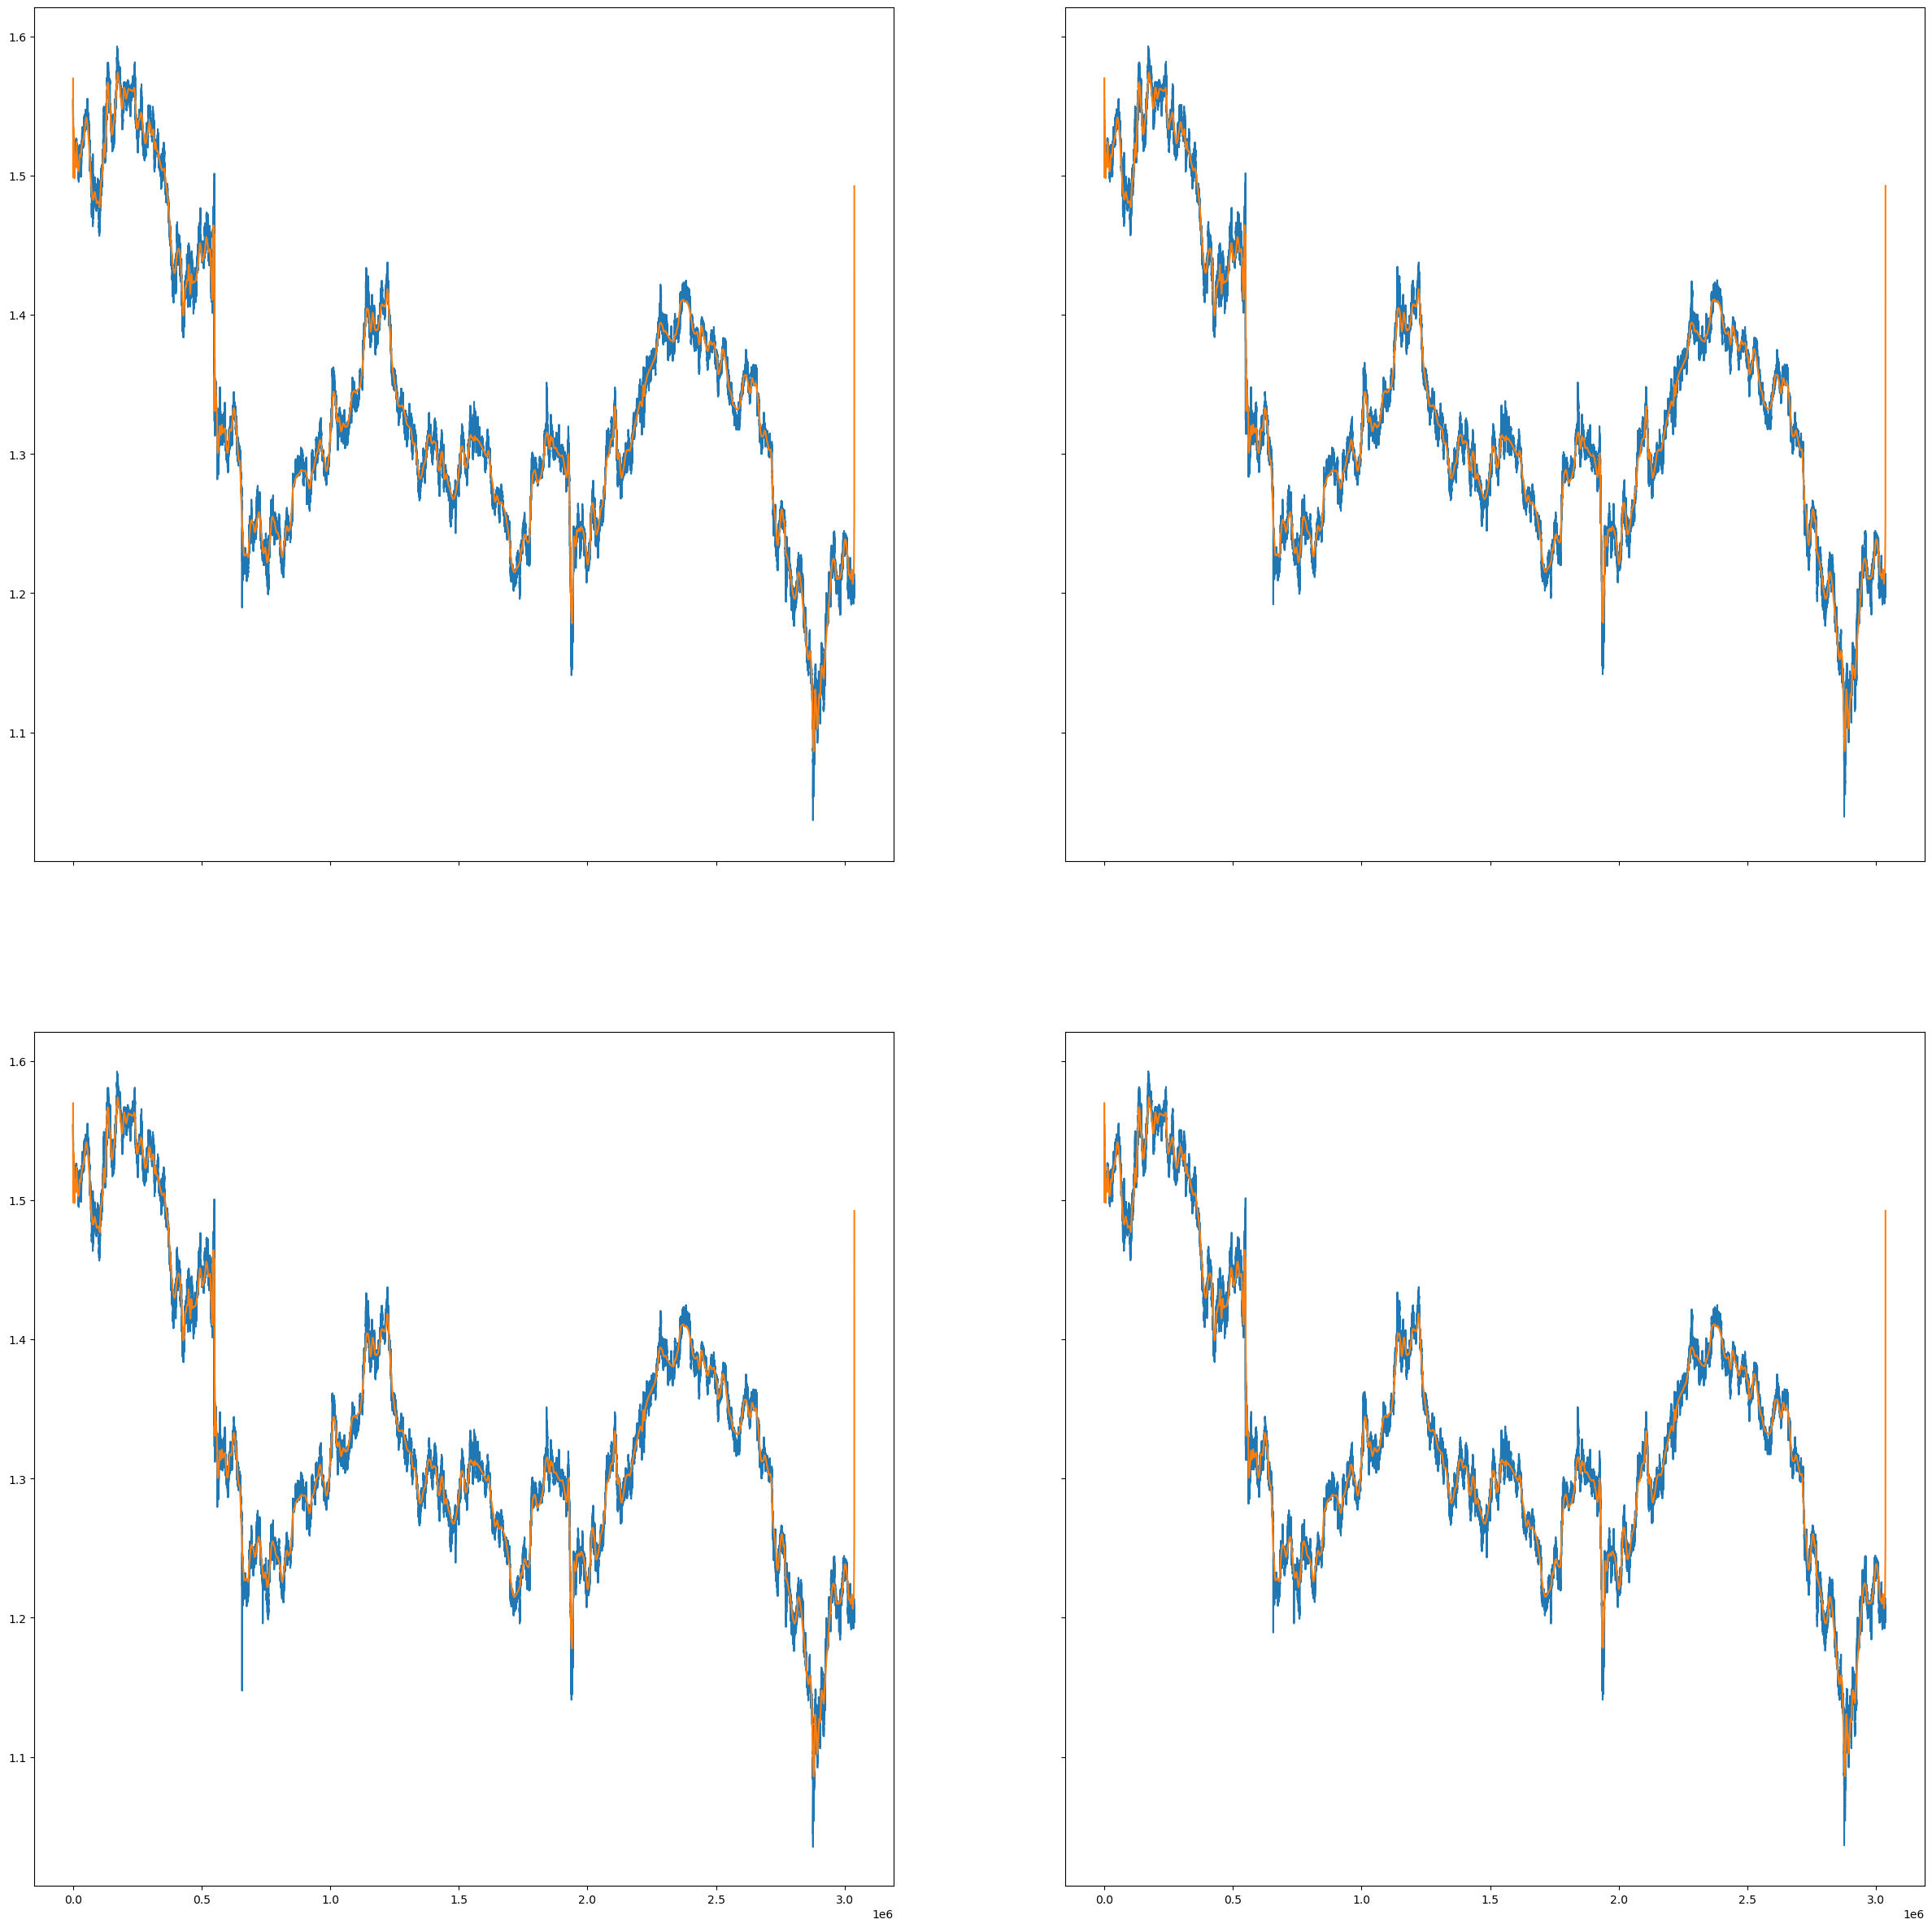

In [187]:
data = pd.read_csv(r'GBPUSD_M1_MT5.csv', sep='\t')
data = data.rename(columns = {'<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close'})

data['open_wave'],data['high_wave'],data['low_wave'],\
data['close_wave']=denoising([data['open'],data['high'],data['low'],data['close']])

fig, axes = plt.subplots(2,2, figsize=(30, 30), sharex=True, sharey=True, squeeze=False)

axes[0,0].plot(data['open'], label='Raw data')
axes[0,0].plot(data['open_wave'], label='Denoised data')

axes[0,1].plot(data['high'], label='Raw data')
axes[0,1].plot(data['high_wave'], label='Denoised data')

axes[1,0].plot(data['low'], label='Raw data')
axes[1,0].plot(data['low_wave'], label='Denoised data')

axes[1,1].plot(data['close'], label='Raw data')
axes[1,1].plot(data['close_wave'], label='Denoised data')